In [6]:
pip install pandas numpy matplotlib seaborn yfinance scikit-learn

**Fetch Real-Time Market**

In [7]:
import yfinance as yf
import pandas as pd

# Fetch historical market data for a given stock ticker
ticker = 'AAPL'  # Example: Apple Inc.
data = yf.download(ticker, start='2023-01-01', end='2024-01-01')
data = data['Close']  # We'll use closing prices for the analysis

# Display the first few rows of the data
print(data.head())


[*********************100%%**********************]  1 of 1 completed

Date
2023-01-03    125.070000
2023-01-04    126.360001
2023-01-05    125.019997
2023-01-06    129.619995
2023-01-09    130.149994
Name: Close, dtype: float64


**Calculate Value at Risk (VaR)**

In [8]:
import numpy as np

def calculate_var(data, confidence_level=0.95):
    # Calculate daily returns
    returns = data.pct_change().dropna()

    # Calculate the VaR at the given confidence level
    var = np.percentile(returns, (1 - confidence_level) * 100)

    return var

# Calculate VaR at 95% confidence level
var_95 = calculate_var(data, confidence_level=0.95)
print(f'VaR at 95% confidence level: {var_95:.2%}')


VaR at 95% confidence level: -1.72%


**Visualize the Data and VaR**

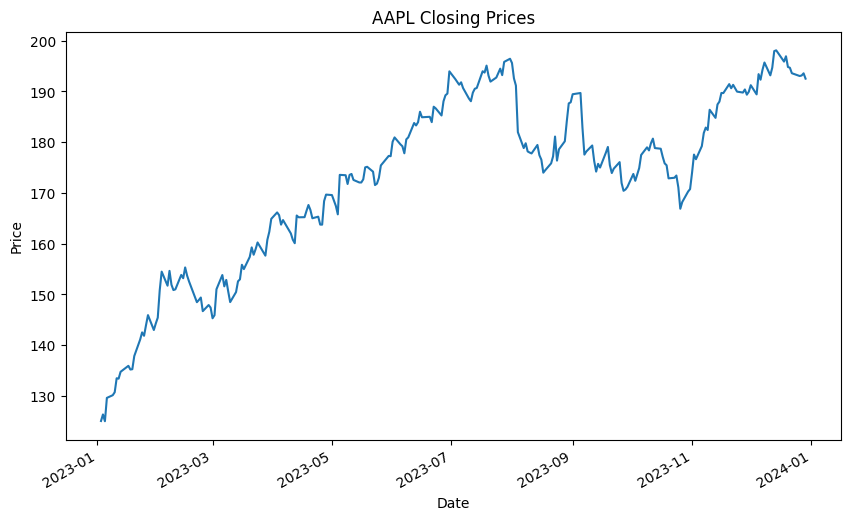

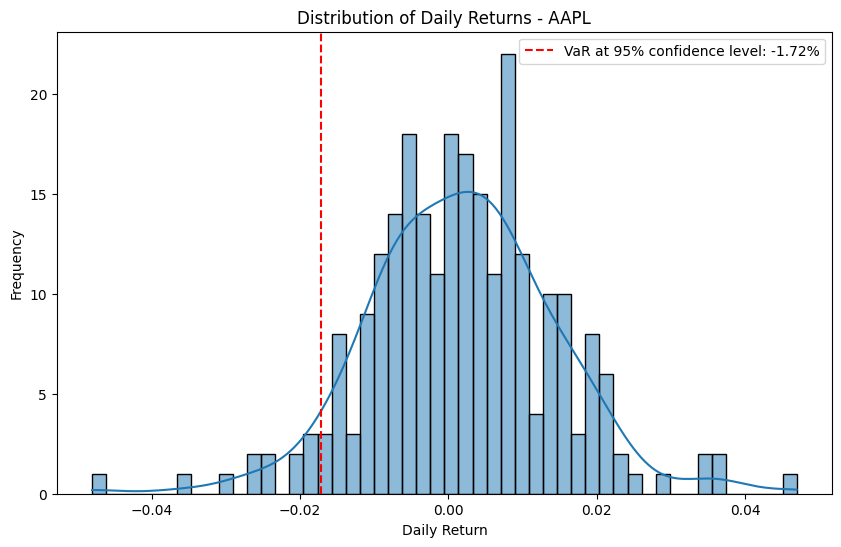

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the historical prices
plt.figure(figsize=(10, 6))
data.plot(title=f'{ticker} Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Plot the distribution of daily returns and VaR
returns = data.pct_change().dropna()

plt.figure(figsize=(10, 6))
sns.histplot(returns, bins=50, kde=True)
plt.axvline(var_95, color='r', linestyle='--', label=f'VaR at 95% confidence level: {var_95:.2%}')
plt.title(f'Distribution of Daily Returns - {ticker}')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.show()


**Implementing an Alert System**

In [10]:
# Check for alerts in the daily returns
def check_alerts(returns, var):
    alerts = returns[returns < var]
    for date, return_ in alerts.items():
        print(f'Alert: {date.date()} - Return: {return_:.2%} exceeds VaR threshold {var:.2%}')

# Check for alerts
check_alerts(returns, var_95)


Alert: 2023-01-30 - Return: -2.01% exceeds VaR threshold -1.72%
Alert: 2023-02-06 - Return: -1.79% exceeds VaR threshold -1.72%
Alert: 2023-02-08 - Return: -1.77% exceeds VaR threshold -1.72%
Alert: 2023-02-21 - Return: -2.67% exceeds VaR threshold -1.72%
Alert: 2023-02-24 - Return: -1.80% exceeds VaR threshold -1.72%
Alert: 2023-08-04 - Return: -4.80% exceeds VaR threshold -1.72%
Alert: 2023-08-07 - Return: -1.73% exceeds VaR threshold -1.72%
Alert: 2023-08-24 - Return: -2.62% exceeds VaR threshold -1.72%
Alert: 2023-09-06 - Return: -3.58% exceeds VaR threshold -1.72%
Alert: 2023-09-07 - Return: -2.92% exceeds VaR threshold -1.72%
Alert: 2023-09-20 - Return: -2.00% exceeds VaR threshold -1.72%
Alert: 2023-09-26 - Return: -2.34% exceeds VaR threshold -1.72%
Alert: 2023-10-26 - Return: -2.46% exceeds VaR threshold -1.72%
